# Kapitza's Pendel

### Wichtige Module 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Parameter

In [2]:
# Parameters
g = 9.81       # gravity
m = 1.0        # mass of pendulum
l = 1.0        # length of pendulum arms
A = 0.5        # amplitude
Omega = 20     # driving frequency

### Bewegungsgleichung in Matrixform

In [3]:
# Define the equation of motion
def eq_of_motion(t, y):
    phi, omega = y
    domega_dt = (A / l * Omega**2 * np.cos(Omega * t) - g / l) * np.sin(phi)
    return [omega, domega_dt]

### Numerische Lösung der Differentialgleichung

In [4]:
y0 = [0.1, 0]  # initial conditions: [phi, omega]
t_span = (0, 10)
t_eval = np.linspace(*t_span, 2000)

sol = solve_ivp(eq_of_motion, t_span, y0, t_eval=t_eval)

t = sol.t
phi = sol.y[0]
omega = sol.y[1]

### Zeitlicher Verlauf des Winkels

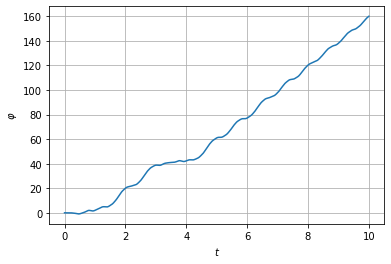

In [5]:
plt.figure()
plt.plot(t, phi)
plt.xlabel(r'$t$')
plt.ylabel(r'$\varphi$')
plt.grid(True)
plt.show()

### Energien als Funktion der Zeit

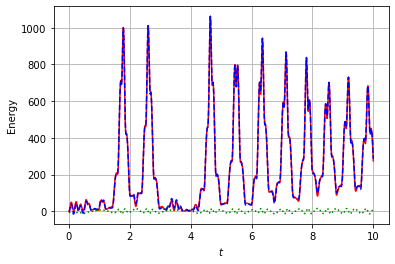

In [6]:
K = 0.5* m * (l**2 * omega**2 - 2 * l * omega * np.sin(phi) * A * Omega * np.sin(Omega*t) + (A * Omega * np.sin(Omega*t))**2)
V = -m * g * (l * np.cos(phi) - A * np.cos(Omega*t))
E = K + V

plt.figure()
plt.plot(t, K, '-r')
plt.plot(t, V, ':g')
plt.plot(t, E, '--b')
plt.xlabel(r'$t$')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

### Erzeugung einer Animation

In [7]:
# Convert to Cartesian coordinates
x = l * np.sin(phi)
y = -l * np.cos(phi) + A * np.cos(Omega * t)

In [8]:
# Animation
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-2.1, 2.1)
ax.set_ylim(-2.1, 2.1)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'r-', lw=2)
bob, = ax.plot([], [], 'ro', markersize=8)
origin, = ax.plot([], [], 'ko', markersize=5)


# Initialization function
def init():
    line.set_data([], [])
    bob.set_data([], [])
    origin.set_data([0], [A * np.cos(Omega * t[0])])
    return line, bob, origin

# Update function
def update(i):
    xi = [0, x[i]]
    yi = [A * np.cos(Omega * t[i]), y[i]]
    line.set_data(xi, yi)
    bob.set_data([x[i]], [y[i]])
    origin.set_data([0], [A * np.cos(Omega * t[i])])
    ax.set_title(f't = {t[i]:.2f} s')
    return line, bob, origin

ani = FuncAnimation(fig, update, frames=range(0, len(t), 5), init_func=init, blit=True)
plt.close(fig)
HTML(ani.to_jshtml())
